In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats
from scipy import interpolate

## SSH variance comparison to AVISO

In [2]:
dir10='/glade/p/univ/ugit0016/rso/ecoUFZ.64t.10km.42lev/ver821/netcdf/'
diro='/glade/work/ito/dataset/ocean/'


## SSH variance

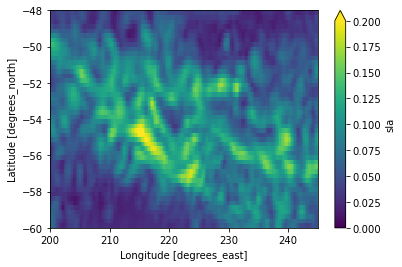

In [3]:
ds=xr.open_mfdataset('/glade/scratch/ito/AVISO/netcdf/aviso_daily_sla_2013_*.nc')
sshvar_AVISO=ds.sla.sel(longitude=slice(200,245)).sel(latitude=slice(-60,-48)).std(dim='time')
sshvar_AVISO.plot(vmin=0,vmax=0.2)

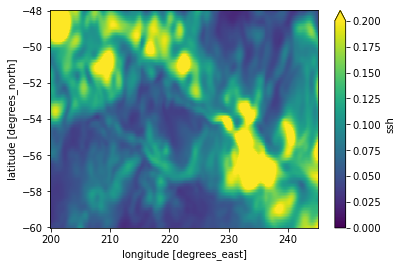

In [4]:
ds=xr.open_dataset(dir10+'ssh_2013.nc')
sshvar_RSO=ds.ssh.sel(lon=slice(200,245)).sel(lat=slice(-60,-48)).std(dim='time')
sshvar_RSO.plot(vmin=0,vmax=0.2)

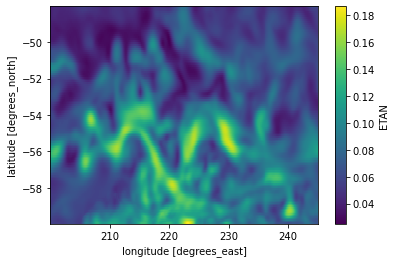

In [5]:
ds=xr.open_dataset(diro+'/BSOSE/bsose_i133_2013to2018_1dy_SSH.nc')
sshvar_BSOSE=ds.ETAN.sel(time=slice('2013-01-1','2013-12-31')).sel(XC=slice(200,245)).sel(YC=slice(-60,-48)).std(dim='time')
sshvar_BSOSE.plot()

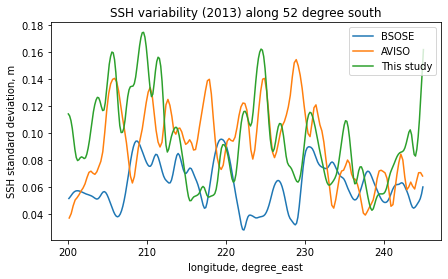

In [6]:
fig=plt.figure(figsize=(7,4))
ylat=-52
# BSOSE i133
ds=xr.open_dataset(diro+'/BSOSE/bsose_i133_2013to2018_1dy_SSH.nc')
sshvar_BSOSE=ds.ETAN.sel(time=slice('2013-01-1','2013-12-31')).sel(XC=slice(200,245)).sel(YC=ylat,method='nearest').std(dim='time')
x=ds.XC.sel(XC=slice(200,245))
plt.plot(x,sshvar_BSOSE,label='BSOSE')
# AVISO
ds=xr.open_mfdataset('/glade/scratch/ito/AVISO/netcdf/aviso_daily_sla_2013_*.nc')
sshvar_AVISO=ds.sla.sel(longitude=slice(200,245)).sel(latitude=ylat,method='nearest').std(dim='time')
x=ds.longitude.sel(longitude=slice(200,245))
plt.plot(x,sshvar_AVISO,label='AVISO')
# RSO
ds=xr.open_dataset(dir10+'ssh_2013.nc')
sshvar_RSO=ds.ssh.sel(lon=slice(200,245)).sel(lat=ylat,method='nearest').std(dim='time')
x=ds.lon.sel(lon=slice(200,245))
plt.plot(x,sshvar_RSO,label='This study')
plt.legend()
plt.xlim()
plt.xlabel('longitude, degree_east')
plt.ylabel('SSH standard deviation, m')
plt.title('SSH variability (2013) along 52 degree south')
plt.savefig('SSHstd_2013_comp.pdf',bbox_inches="tight")
plt.show()